In [ ]:
import torch                                                                           # torch is an en source ml lbrary for creating deep learnng nerual network
import torch.nn as nn                                                                  # help to build neural network
import torchvision                                                                     # library for Computer Vision that goes hand in hand with PyTorch                                                                     
from torchvision import transforms
from torchsummary import summary                                                       # Summarize the given PyTorch model
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt                                                       # data visualization and graphical plotting library
import numpy as np
import cv2                                                                             # OpenCV is a great tool for image processing and performing computer vision tasks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.read_csv('/content/drive/MyDrive/insat_3d_ds - Sheet.csv')

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'    #cyclone images
ROOT_DIR = '/content'

In [ ]:
def get_train_file_path(id):
    return f"{TRAIN_DIR}/{id}"                                                         # F-strings provide a way to embed expressions inside string literals, using a minimal syntax

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/insat_3d_ds - Sheet.csv")
df['file_path'] = df['img_name'].apply(get_train_file_path)                            # file path applied to each image

In [ ]:
df

,img_name,label,file_path
0,25.jpg,25,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
1,27.jpg,27,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
2,28.jpg,28,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
3,30.jpg,30,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
4,30(1).jpg,30,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
...,...,...,...
131,112.jpg,112,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
132,115.jpg,115,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
133,118.jpg,118,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
134,119.jpg,119,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...


In [ ]:

df = df.drop([df.index[32] , df.index[116], df.index[124]])                             # withdraw 3 images having varying intensities for evaluating model performance

In [ ]:
df

,img_name,label,file_path
0,25.jpg,25,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
1,27.jpg,27,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
2,28.jpg,28,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
3,30.jpg,30,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
4,30(1).jpg,30,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
...,...,...,...
131,112.jpg,112,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
132,115.jpg,115,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
133,118.jpg,118,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
134,119.jpg,119,/content/drive/MyDrive/insat3d_ir_cyclone_ds/C...


In [ ]:
df.keys

<bound method NDFrame.keys of       img_name  label                                          file_path
0       25.jpg     25  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
1       27.jpg     27  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
2       28.jpg     28  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
3       30.jpg     30  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
4    30(1).jpg     30  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
..         ...    ...                                                ...
131    112.jpg    112  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
132    115.jpg    115  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
133    118.jpg    118  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
134    119.jpg    119  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...
135    128.jpg    128  /content/drive/MyDrive/insat3d_ir_cyclone_ds/C...

[133 rows x 3 columns]>

In [ ]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135],
           dtype='int64', length=133)

In [ ]:
class CycloneDataset(Dataset):
  def __init__(self, df, transforms=None):
    self.df = df
    self.file_names = df['file_path'].values
    self.labels = df['label'].values
    self.transforms = transforms
        
  def __len__(self):
    return len(self.df)

#transforms.compose reminder
 
  def __getitem__(self, index):
    img_path = self.file_names[index]
    img = cv2.imread(img_path)
    img = np.array(img)
    totensor = transforms.ToTensor()                                                    # converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) with a range [0.0, 1.0]
    img = totensor(img)
    resize = transforms.Resize(size=(250, 250))                                         # resize the image
    img = resize(img)
    flip = transforms.RandomHorizontalFlip(p = 0.5)                                     # Horizontally flip the given image randomly with a given probability
    img = flip(img)                                                
    label = self.labels[index]
        
    return img, torch.tensor(label, dtype=torch.long).float()


In [ ]:
dataset = CycloneDataset(df)

In [ ]:
dataset

In [ ]:
dataset = CycloneDataset(df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
data_loader


In [ ]:
import numpy as np

In [ ]:
dataset[131]

(tensor([[[0.6549, 0.3959, 0.3122,  ..., 0.0937, 0.0919, 0.0586],
          [0.6604, 0.4274, 0.3367,  ..., 0.0908, 0.0888, 0.0615],
          [0.6610, 0.4435, 0.3306,  ..., 0.0817, 0.0814, 0.0699],
          ...,
          [0.6517, 0.3200, 0.2422,  ..., 0.2681, 0.2799, 0.2446],
          [0.6763, 0.1860, 0.1351,  ..., 0.2837, 0.2914, 0.2574],
          [0.7164, 0.2850, 0.2539,  ..., 0.2356, 0.2301, 0.2032]],
 
         [[0.9758, 0.8998, 0.9440,  ..., 0.1325, 0.1336, 0.1048],
          [0.9782, 0.9186, 0.9553,  ..., 0.1247, 0.1269, 0.1021],
          [0.9776, 0.9187, 0.9339,  ..., 0.1137, 0.1183, 0.1091],
          ...,
          [0.8764, 0.6001, 0.5661,  ..., 0.6799, 0.6697, 0.6178],
          [0.8158, 0.3707, 0.3501,  ..., 0.7418, 0.7248, 0.6741],
          [0.8015, 0.4178, 0.4144,  ..., 0.7242, 0.6923, 0.6455]],
 
         [[0.9719, 0.8880, 0.9360,  ..., 0.5963, 0.5861, 0.5457],
          [0.9784, 0.9330, 0.9692,  ..., 0.6009, 0.5917, 0.5593],
          [0.9829, 0.9581, 0.9843,  ...,

INTENSITY: 65.0 KNOTS
SIZE: torch.Size([3, 250, 250])



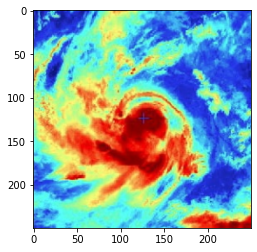

In [ ]:
#print a random image from the dataset
import random
i = random.randint(0, 132)
img, label = dataset[i]
size = img.shape
print(f"INTENSITY: {label} KNOTS")
print(f"SIZE: {size}\n")
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
import matplotlib.image as mpimg
import glob

In [ ]:
for i in range(132):
  x, y = dataset[i]
  print(x.shape)

torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([3, 250, 250])
torch.Size([

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(                                                 #conv2d,batchnorm,relu,maxpool will execute in sequential manner by ussing nn.sequential
        nn.Conv2d(3, 256, kernel_size=3, stride=1, padding=1),                  #Applies a 2D convolution by multiply and add two matrices
        nn.BatchNorm2d(256),                                                    #To make training efficient dataset is scaled to 0 mean and 1 variance 
        nn.ReLU(),                                                              #To break down the linearity relu activation function is used
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2),                                                        #pool of square window of size=3(reduces feature size by taking only max,hence img size is reduced from 256-128-64-32-16)
                                                                                #taking only max,hence img size is reduced from 256-128-64-32-16)
        nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),                                                                       # used to convert multi-dimensional arrays into a 1-D array 
        nn.Linear(784, 1),                                                                  # Out of 784 pixels need only one pixel hence used linear transformation
        )
  def forward(self, x):
    return self.model(x)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")                     # CUDA cores are 1000 times faster than cpu, used to increase the speed of execution 
device

device(type='cuda', index=0)

 output shape [-1, 256, 250, 250], this is the output shape of  our first conv output, which has 256 filter each of 250x250 dim and  not  input_shape. -1 represents our variable batch_size which can be fixed in dataloader

In [ ]:
model = Model().to(device)                                                                   # to tell python to connect the cuda device
summary(model, (3, 250, 250))                                                       # Model summary is displayed 
                                                                                    # 3 is RGB channel

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 250, 250]           7,168
       BatchNorm2d-2        [-1, 256, 250, 250]             512
              ReLU-3        [-1, 256, 250, 250]               0
            Conv2d-4        [-1, 256, 250, 250]         590,080
       BatchNorm2d-5        [-1, 256, 250, 250]             512
              ReLU-6        [-1, 256, 250, 250]               0
         MaxPool2d-7        [-1, 256, 125, 125]               0
            Conv2d-8        [-1, 128, 125, 125]         295,040
       BatchNorm2d-9        [-1, 128, 125, 125]             256
             ReLU-10        [-1, 128, 125, 125]               0
           Conv2d-11        [-1, 128, 125, 125]         147,584
      BatchNorm2d-12        [-1, 128, 125, 125]             256
             ReLU-13        [-1, 128, 125, 125]               0
        MaxPool2d-14          [-1, 128,

In [ ]:
loss_per_iteration = []
acc = []
def train_batch(epochs, model, criterion, optimizer, train_loader):
  total = 0
  correct = 0 
  for i in range(epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:                                                  # Train_loader continously provide images
      inputs, labels = inputs.to(device), labels.to(device)                              # get the inputs, labels
      outputs = model(inputs)                                                    
      labels = torch.unsqueeze(labels, 1)                                                # unsqueeze is a method to change the tensor dimensions
      loss = criterion(outputs, labels)                                                  
      optimizer.zero_grad()                                                              # zero the parameter gradients                                                          
      loss.backward()                                                                    # Takes loss and track backward to update the weights
      optimizer.step()                                                                   # Perform single optimization step
      train_loss = train_loss + loss.item()
     
       #Accuracy
    
    print(f"Epoch: {i}/{epochs} Loss: {train_loss/len(train_loader):.5f} ")
    loss_per_iteration.append(train_loss/len(train_loader))
    acc.append(correct)
  return loss_per_iteration


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 17 04:00:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    26W /  70W |   1783MiB / 15360MiB |     26%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Epoch: 0/35 Loss: 938.16912 
Epoch: 1/35 Loss: 464.76877 
Epoch: 2/35 Loss: 406.09763 
Epoch: 3/35 Loss: 335.59763 
Epoch: 4/35 Loss: 369.91515 
Epoch: 5/35 Loss: 374.43906 
Epoch: 6/35 Loss: 324.48248 
Epoch: 7/35 Loss: 359.26656 
Epoch: 8/35 Loss: 311.05303 
Epoch: 9/35 Loss: 305.27933 
Epoch: 10/35 Loss: 278.73513 
Epoch: 11/35 Loss: 287.91730 
Epoch: 12/35 Loss: 304.19748 
Epoch: 13/35 Loss: 272.31624 
Epoch: 14/35 Loss: 312.31363 
Epoch: 15/35 Loss: 309.63222 
Epoch: 16/35 Loss: 249.02806 
Epoch: 17/35 Loss: 252.97019 
Epoch: 18/35 Loss: 224.90028 
Epoch: 19/35 Loss: 275.17730 
Epoch: 20/35 Loss: 265.59378 
Epoch: 21/35 Loss: 244.39154 
Epoch: 22/35 Loss: 193.84484 
Epoch: 23/35 Loss: 244.75125 
Epoch: 24/35 Loss: 246.26631 
Epoch: 25/35 Loss: 214.46812 
Epoch: 26/35 Loss: 187.83150 
Epoch: 27/35 Loss: 244.31922 
Epoch: 28/35 Loss: 246.36078 
Epoch: 29/35 Loss: 238.10498 
Epoch: 30/35 Loss: 222.48387 
Epoch: 31/35 Loss: 220.23121 
Epoch: 32/35 Loss: 240.86557 
Epoch: 33/35 Loss: 2

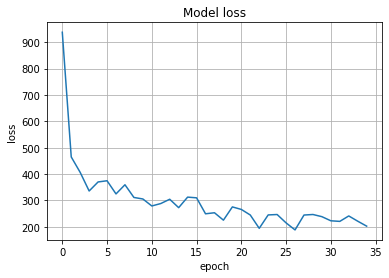

In [ ]:
######## MSE Loss using Adam Optimizer
model = Model().to(device)                                                                # model is originally stored on CPU, and then I want to move it to GPU0
criterion = nn.MSELoss()                                                                  # Creates a criterion that measures the mean squared error
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)                               # Adam is one of the standard optimizer, require fewer parameters for tuning

loss = train_batch(epochs=35,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            train_loader = data_loader)
loss_array = np.array(loss) 
loss_max = loss_array.max()
accuracy = ((loss_max - loss_array)/loss_max)*100.0
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model loss')
plt.grid(True)
  
plt.show()

In [ ]:
accuracy

array([ 0.        , 50.46002298, 56.71381453, 64.22845098, 60.57052597,
       60.08831968, 65.41322075, 61.70556579, 66.8446742 , 67.46009612,
       70.28945781, 69.31072462, 67.57541069, 70.97365095, 66.7103062 ,
       66.99611847, 73.45595206, 73.03575813, 76.02774673, 70.6686889 ,
       71.69020268, 73.95016138, 79.33796399, 73.91181982, 73.7503288 ,
       77.13971627, 79.97892981, 73.95787004, 73.74025933, 74.62024953,
       76.28531319, 76.52542563, 74.3259968 , 76.44534048, 78.45820861])

Text(0, 0.5, 'Accuracy')

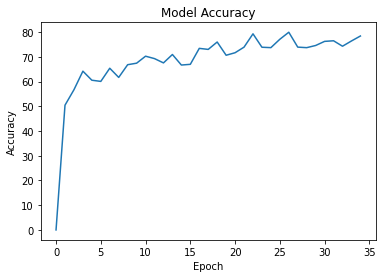

In [ ]:
plt.plot(accuracy)
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Epoch: 0/35 Loss: 23.40091 
Epoch: 1/35 Loss: 17.78964 
Epoch: 2/35 Loss: 16.17369 
Epoch: 3/35 Loss: 15.79735 
Epoch: 4/35 Loss: 14.48765 
Epoch: 5/35 Loss: 15.01629 
Epoch: 6/35 Loss: 14.68019 
Epoch: 7/35 Loss: 13.13722 
Epoch: 8/35 Loss: 14.32524 
Epoch: 9/35 Loss: 13.91409 
Epoch: 10/35 Loss: 14.45648 
Epoch: 11/35 Loss: 14.57577 
Epoch: 12/35 Loss: 13.48835 
Epoch: 13/35 Loss: 14.22618 
Epoch: 14/35 Loss: 13.32821 
Epoch: 15/35 Loss: 13.45142 
Epoch: 16/35 Loss: 13.12387 
Epoch: 17/35 Loss: 13.59189 
Epoch: 18/35 Loss: 12.96193 
Epoch: 19/35 Loss: 14.03765 
Epoch: 20/35 Loss: 13.10718 
Epoch: 21/35 Loss: 12.88387 
Epoch: 22/35 Loss: 12.26880 
Epoch: 23/35 Loss: 13.24817 
Epoch: 24/35 Loss: 12.76442 
Epoch: 25/35 Loss: 12.79183 
Epoch: 26/35 Loss: 12.80320 
Epoch: 27/35 Loss: 12.94618 
Epoch: 28/35 Loss: 12.11256 
Epoch: 29/35 Loss: 12.32059 
Epoch: 30/35 Loss: 13.16470 
Epoch: 31/35 Loss: 12.12751 
Epoch: 32/35 Loss: 12.88712 
Epoch: 33/35 Loss: 11.55203 
Epoch: 34/35 Loss: 11.11

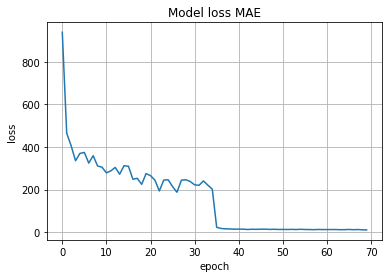

Text(0, 0.5, 'Accuracy')

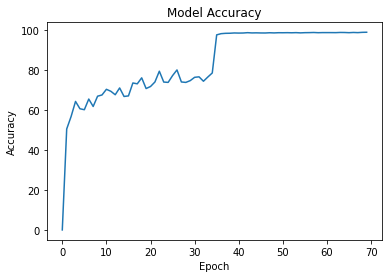

In [ ]:
#######  MAE LOSS using ADAM Optimizer  #######
model = Model().to(device)                                                                # model is originally stored on CPU, and then I want to move it to GPU0
criterion = nn.L1Loss()                                                                  # Creates a criterion that measures the mean squared error
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)                               # Adam is one of the standard optimizer, require fewer parameters for tuning

loss = train_batch(epochs=35,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            train_loader = data_loader)

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model loss MAE')
plt.grid(True)
  
plt.show()
#Accurracy
loss_array = np.array(loss) 
loss_max = loss_array.max()
accuracy = ((loss_max - loss_array)/loss_max)*100.0
plt.plot(accuracy)
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Epoch: 0/35 Loss: 1166.50013 
Epoch: 1/35 Loss: 786.68813 
Epoch: 2/35 Loss: 642.53296 
Epoch: 3/35 Loss: 915.92674 
Epoch: 4/35 Loss: 963.21835 
Epoch: 5/35 Loss: 1035.61795 
Epoch: 6/35 Loss: 3951.57831 
Epoch: 7/35 Loss: 3077.52904 
Epoch: 8/35 Loss: 2744.95854 
Epoch: 9/35 Loss: 2476.32273 
Epoch: 10/35 Loss: 2195.37154 
Epoch: 11/35 Loss: 1976.62033 
Epoch: 12/35 Loss: 1788.13788 
Epoch: 13/35 Loss: 1631.15209 
Epoch: 14/35 Loss: 1504.13179 
Epoch: 15/35 Loss: 1349.18749 
Epoch: 16/35 Loss: 1299.75337 
Epoch: 17/35 Loss: 1137.44809 
Epoch: 18/35 Loss: 1053.73715 
Epoch: 19/35 Loss: 1113.05107 
Epoch: 20/35 Loss: 910.40549 
Epoch: 21/35 Loss: 853.36938 
Epoch: 22/35 Loss: 806.77133 
Epoch: 23/35 Loss: 805.74907 
Epoch: 24/35 Loss: 724.14891 
Epoch: 25/35 Loss: 692.02846 
Epoch: 26/35 Loss: 664.03807 
Epoch: 27/35 Loss: 639.18347 
Epoch: 28/35 Loss: 617.89824 
Epoch: 29/35 Loss: 599.69251 
Epoch: 30/35 Loss: 585.96075 
Epoch: 31/35 Loss: 568.66751 
Epoch: 32/35 Loss: 587.25370 
Epoc

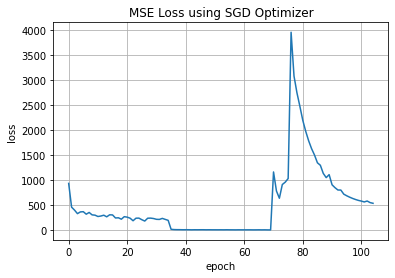

Text(0, 0.5, 'Accuracy')

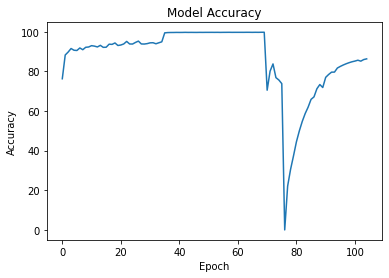

In [ ]:
######## MSE LOSS USING SGD ########
model = Model().to(device)                                                                # model is originally stored on CPU, and then I want to move it to GPU0
criterion = nn.MSELoss()                                                                  # Creates a criterion that measures the mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr =0.001)                               # Adam is one of the standard optimizer, require fewer parameters for tuning

loss = train_batch(epochs=35,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            train_loader = data_loader)

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('MSE Loss using SGD Optimizer')
plt.grid(True)
plt.show()

#Accurracy
loss_array = np.array(loss) 
loss_max = loss_array.max()
accuracy = ((loss_max - loss_array)/loss_max)*100.0
plt.plot(accuracy)
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [ ]:
img = cv2.imread('/content/drive/MyDrive/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/101.jpg')
img = np.array(img)                                                                   # Convert image into array
totensor = transforms.ToTensor()
img = totensor(img)                                                                   # Convert numpy.ndarray to tensor
resize = transforms.Resize(size=(248, 248))                                           # Resie the image      
img = resize(img)                                                 
img = torch.unsqueeze(img, 0)                                                         # change dimensions of image
img = img.to(device)
model(img)

tensor([[50.5051]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/102.jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(248, 248))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
model(img)

tensor([[50.5071]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
saved_path = './saved_modelcyclonr'
torch.save(model.state_dict(), saved_path)

In [ ]:
torch.save(model.state_dict,'cyclonemodel2.h5')

In [ ]:
torch.save(model.state_dict,'cyclonemodel2.pth')

In [ ]:
model= Model()
model.load_state_dict(torch.load('/content/saved_modelcyclonr', map_location=torch.device('cpu')))
model.eval()

Model(
  (model): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [ ]:
path = '/content/drive/MyDrive/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/111.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[50.4811]], grad_fn=<AddmmBackward0>)

In [ ]:
path = '/content/drive/MyDrive/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/118.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[50.4811]], grad_fn=<AddmmBackward0>)

In [ ]:
from google.colab import files
files.download('/content/saved_modelcyclonr')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



In [ ]:
path = '/content/drive/MyDrive/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/119.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
model(img).item()

50.48106002807617